<a href="https://colab.research.google.com/github/jydiw/ames-housing/blob/master/ames_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

Data taken from [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](http://jse.amstat.org/v19n3/decock.pdf) by Dean De Cock (hereinafter referred to as 'the author').

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## import data

One method to upload data to Google Colab:

- upload data to github
- navigate to data on github and click "Raw" to view the raw file
- copy URL and then import using `pandas`

In [ ]:
train_url = 'https://raw.githubusercontent.com/jydiw/data-science-case-studies/master/regression_ames-housing/data/train.csv'
train = pd.read_csv(train_url)
train.shape

(2051, 81)

In [ ]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,...,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,...,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,...,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,...,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,...,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## rename columns

In [ ]:
def column_renamer(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('/', '_')
    return df

In [ ]:
train = column_renamer(train)
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

## deal with `NaN` and convert data types

In [ ]:
def show_nan(df, show_all=False, ascending=False):

    info_df = pd.DataFrame(index=[df.columns], 
                           columns=['dtype', 'sum_na', 'mean_na'])
    info_df['dtype'] = df.dtypes.values
    info_df['sum_na'] = df.isna().sum().values
    info_df['mean_na'] = df.isna().mean().values
    
    if show_all:
        return info_df.sort_index()
    else:
        return info_df[info_df['sum_na'] != 0].sort_values(
            by='sum_na', 
            ascending=ascending)

In [ ]:
nans = show_nan(train)
nans

,dtype,sum_na,mean_na
pool_qc,object,2042,0.995612
misc_feature,object,1986,0.968308
alley,object,1911,0.931741
fence,object,1651,0.804973
fireplace_qu,object,1000,0.487567
lot_frontage,float64,330,0.160897
garage_yr_blt,float64,114,0.055583
garage_cond,object,114,0.055583
garage_qual,object,114,0.055583
garage_finish,object,114,0.055583


Since `pool_qc` and `misc_feature` feature over 95% `NaN` values, they likely do not offer much predictive power. We can probably drop them. For the other features, we can refer to the data dictionary to deal with `NaN` values more precisely. Let's take a look at the nominal data:

In [ ]:
for col in train.columns:
    if train[col].dtype == 'O':
        print(col)
        print(train[col].value_counts(dropna=False, normalize=True))
        print()

ms_zoning
RL         0.779132
RM         0.154071
FV         0.049244
C (all)    0.009264
RH         0.006826
A (agr)    0.000975
I (all)    0.000488
Name: ms_zoning, dtype: float64

street
Pave    0.996587
Grvl    0.003413
Name: street, dtype: float64

alley
NaN     0.931741
Grvl    0.041443
Pave    0.026816
Name: alley, dtype: float64

lot_shape
Reg    0.631399
IR1    0.337396
IR2    0.026816
IR3    0.004388
Name: lot_shape, dtype: float64

land_contour
Lvl    0.898586
HLS    0.041443
Bnk    0.039005
Low    0.020965
Name: land_contour, dtype: float64

utilities
AllPub    0.999025
NoSewr    0.000488
NoSeWa    0.000488
Name: utilities, dtype: float64

lot_config
Inside     0.732813
Corner     0.169673
CulDSac    0.063871
FR2        0.029254
FR3        0.004388
Name: lot_config, dtype: float64

land_slope
Gtl    0.952218
Mod    0.042906
Sev    0.004876
Name: land_slope, dtype: float64

neighborhood
NAmes      0.151146
CollgCr    0.087762
OldTown    0.079473
Edwards    0.069722
Somerst  

For `alley`, `bsmt_cond`, `bsmt_exposure`, `bsmt_height`, `bsmtfin_type_1`, `bsmtfin_type_2`, `fence`, `fireplace_qu`, `garage_cond`, `garage_finish`, `garage_qual`, `garage_type`, and `misc_feature`, `NaN` actually means "None". It probably means "None" for `mas_vnr_type` as well.

For all of the quantitative (`float64`) data, `NaN` likely means `0`.

Some of the features are quite imbalanced in their values (eg `utilities`) and are likely not going to be good predictors, either:

In [ ]:
def show_imbalance(df, show_all=False, ascending=False, threshold=0.95):

    info_df = pd.DataFrame(index=[df.columns], 
                           columns=['dtype', 'major_class', 'frac'])
    info_df['dtype'] = df.dtypes.values
    for i in df.columns:
        vc = df[i].value_counts(ascending=False, normalize=True)
        info_df.loc[i, 'major_class'] = vc.index[0]
        info_df.loc[i, 'frac'] = vc.values[0]
    
    if show_all:
        return info_df.sort_index()
    else:
        return info_df[info_df['frac'] >= threshold].sort_values(
            by='frac', 
            ascending=ascending)

In [ ]:
imbalances = show_imbalance(train)
imbalances

,dtype,major_class,frac
utilities,object,AllPub,0.999025
street,object,Pave,0.996587
pool_area,int64,0,0.995612
condition_2,object,Norm,0.987323
roof_matl,object,CompShg,0.987323
3ssn_porch,int64,0,0.987323
heating,object,GasA,0.98391
low_qual_fin_sf,int64,0,0.98391
misc_val,int64,0,0.968308
garage_cond,object,TA,0.964378


In [ ]:
train = train.drop(columns=imbalances.index.get_level_values(0).to_list() + ['pool_qc', 'misc_feature'])

In [ ]:
def fill_none(df):
    df = df.apply(lambda x: x.fillna('none') if x.dtype.kind == 'O' else x)
    df = df.apply(lambda x: x.fillna(0) if x.dtype.kind == 'f' else x)
    return df

In [ ]:
train = fill_none(train)
get_info(train)

,dtype,sum_na,mean_na


Some of the ordinal columns should be treated as nominal categories, namely the `ms_subclass` and `month` columns.

In [ ]:
def number_to_category(df):
    mssc_dict = {}
    for mssc in set(df['ms_subclass']):
        mssc_dict[mssc] = 'MSSC' + str(mssc)
    month_dict = {
        1: 'jan',
        2: 'feb',
        3: 'mar',
        4: 'apr',
        5: 'may',
        6: 'jun',
        7: 'jul',
        8: 'aug',
        9: 'sep',
        10: 'oct',
        11: 'nov',
        12: 'dec'
    }
    df = df.replace({'ms_subclass': mssc_dict, 'mo_sold': month_dict})
    return df

In [ ]:
train = number_to_category(train)
train[['ms_subclass', 'mo_sold']].head()

,ms_subclass,mo_sold
0,MSSC60,mar
1,MSSC60,apr
2,MSSC20,jan
3,MSSC60,apr
4,MSSC50,mar


Many of the nominal features should actually be ordinal.

In [ ]:
def category_to_number(df):
        
    lot_dict = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
    rank_dict = {'none': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    bsmt_exp_dict = {'none': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
    bsmt_fin_dict = {'none': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 
                     'ALQ': 5, 'GLQ': 6}
    central_dict = {'N': 0, 'Y': 1}
    func_dict = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 
                 'Min1': 7, 'Typ': 8}
    garage_dict = {'none': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
    pave_dict = {'N': 0, 'P': 1, 'Y': 2}
    pool_dict = {'none': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

    lot_cols = ['lot_shape']
    rank_cols = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 
                 'heating_qc', 'kitchen_qual', 'fireplace_qu',  'garage_qual', 
                 'garage_cond']
    bsmt_exp_cols = ['bsmt_exposure']
    bsmt_fin_cols = ['bsmt_type_1', 'bsmt_type_2']
    central_cols = ['central_air']
    func_cols = ['functional']
    garage_cols = ['garage_finish']
    pave_cols = ['paved_drive']
    pool_cols = ['pool_qc']
    
    dicts = [
        lot_dict,
        rank_dict,
        bsmt_exp_dict,
        bsmt_fin_dict,
        central_dict,
        func_dict,
        garage_dict,
        pave_dict,
        pool_dict
    ]
    
    cols = [
        lot_cols,
        rank_cols,
        bsmt_exp_cols,
        bsmt_fin_cols,
        central_cols,
        func_cols,
        garage_cols,
        pave_cols,
        pool_cols
    ]
    
    for i, d in enumerate(dicts):
        for c in cols[i]:
            df = df.replace({c: d})
    
    return df

In [ ]:
train = category_to_number(train)
train_info = get_info(train)
train_info

,dtype,sum_na,mean_na


Some of the categories also have a high degree of cardinality (eg: `neighborhood`) which will affect modeling performance as well as introduce issues when cross-validating if we were to one-hot encode; on the other hand, it would be a shame to remove these features from our model. Let's earmark this thought for now.

### things to note:

`gr_liv_area` = `1st_flr_sf` + `2nd_flr_sf` + `low_qual_fin_sf`. It may be worth using these variables separately in an MLR.

In [ ]:
train[
    train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf'] != train['gr_liv_area']
]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


Same with `total_bsmt_sf` = `bsmtfin_sf_1` + `bsmtfin_sf_2` + `bsmt_unf_sf`.

In [ ]:
train[
    train['bsmtfin_sf_1'] + train['bsmtfin_sf_2'] + train['bsmt_unf_sf'] != train['total_bsmt_sf']
]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


## engineer 'age' columns

Since housing prices can vary wildly between years, we will calculate the 'age' of various features by finding the difference between sale date and built date, remodel date, and garage date. From there, we will cast the year sold as nominal categories (since that is most likely not an ordinal relationship).

In [ ]:
def year_to_age(df, train=True):
    
    df['age'] = df['yr_sold'] - df['year_built']
    df['remod_age'] = df['yr_sold'] - df['year_remod_add']
    df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']

    df.loc[df['garage_age'] > df['age'].max(), 'garage_age'] = 0

    if train:
        for col in ['age', 'remod_age', 'garage_age']:
            df.drop(
                index=df[df[col] < 0].index.values,
                inplace=True
            )
    
    year_dict = {
        2006: 'six',
        2007: 'seven',
        2008: 'eight',
        2009: 'nine',
        2010: 'ten'
    }
    
    df = df.replace({'yr_sold': year_dict})

    df = df.drop(columns=['year_built', 'year_remod_add', 'garage_yr_blt'])
    
    return df

In [ ]:
train = year_to_age(train)
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,fence,mo_sold,yr_sold,sale_type,saleprice,age,remod_age,garage_age
0,109,533352170,MSSC60,RL,0.0,13517,none,3,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6,8,Gable,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,5,1,SBrkr,725,754,1479,0.0,0.0,2,1,3,4,6,8,0,0,Attchd,2,2.0,475.0,3,2,0,44,0,0,none,mar,ten,WD,130500,34,5,34.0
1,544,531379050,MSSC60,RL,43.0,11492,none,3,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,5,1,SBrkr,913,1209,2122,1.0,0.0,2,1,4,4,8,8,1,3,Attchd,2,2.0,559.0,3,2,0,74,0,0,none,apr,nine,WD,220000,13,12,12.0
2,153,535304180,MSSC20,RL,68.0,7922,none,4,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,7,Gable,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,3,1,SBrkr,1057,0,1057,1.0,0.0,1,0,3,4,5,8,0,0,Detchd,1,1.0,246.0,3,2,0,52,0,0,none,jan,ten,WD,109000,57,3,57.0
3,318,916386060,MSSC60,RL,73.0,9802,none,4,Lvl,Inside,Timber,Norm,1Fam,2Story,5,5,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,4,1,SBrkr,744,700,1444,0.0,0.0,2,1,3,3,7,8,0,0,BuiltIn,3,2.0,400.0,3,2,100,0,0,0,none,apr,ten,WD,174000,4,3,3.0
4,255,906425045,MSSC50,RL,82.0,14235,none,3,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6,8,Gable,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,3,1,SBrkr,831,614,1445,0.0,0.0,2,0,3,3,6,8,0,0,Detchd,1,2.0,484.0,3,0,0,59,0,0,none,mar,ten,WD,138500,110,17,53.0


## combining all EDA steps into one function

We want to pre-process our test data the same way, so it's best to consolidate all of our EDA steps into one function.

Per suggestion of the author, it's recommended to remove data points above 4000 square feet (`gr_liv_area`) from the training set.

In [ ]:
def EDA(df, train=True):
    df = column_renamer(df)
    # drop columns with high NaN or have no correlation (eg ID)
    drop_cols = ['id', 'pid', 'pool_qc', 'misc_feature', 'alley', 'fence',
                 'utilities', 'street', 'pool_area', 'condition_2', 'roof_matl',
                 '3ssn_porch', 'heating', 'low_qual_fin_sf', 'misc_val',
                 'garage_cond', 'kitchen_abvgr', 'land_slope']
    df = df.drop(columns=drop_cols)
    if train:
        df = df[df['gr_liv_area'] <= 4000]
    df = fill_none(df)
    df = number_to_category(df)
    df = category_to_number(df)
    df = year_to_age(df, train)

    # fixes pipeline problems down the road
    for col in df.select_dtypes(exclude=['O']).columns.values:
        df[col] = df[col].astype('float')
    for col in df.select_dtypes(include=['O']).columns.values:
        df[col] = df[col].astype('str')

    return df

In [ ]:
train_url = 'https://raw.githubusercontent.com/jydiw/data-science-case-studies/master/regression_ames-housing/data/train.csv'
train = pd.read_csv(train_url)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,...,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,...,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,...,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,...,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,...,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [ ]:
test_url = 'https://raw.githubusercontent.com/jydiw/data-science-case-studies/master/regression_ames-housing/data/test.csv'
test = pd.read_csv(test_url)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [ ]:
print(train.shape)
train = EDA(train)
print(train.shape)
train.head()

(2051, 81)
(2047, 63)


,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice,age,remod_age,garage_age
0,MSSC60,RL,0.0,13517.0,3.0,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6.0,8.0,Gable,HdBoard,Plywood,BrkFace,289.0,4.0,3.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,0.0,192.0,725.0,5.0,1.0,SBrkr,725.0,754.0,1479.0,0.0,0.0,2.0,1.0,3.0,4.0,6.0,8.0,0.0,0.0,Attchd,2.0,2.0,475.0,3.0,2.0,0.0,44.0,0.0,0.0,mar,ten,WD,130500.0,34.0,5.0,34.0
1,MSSC60,RL,43.0,11492.0,3.0,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7.0,5.0,Gable,VinylSd,VinylSd,BrkFace,132.0,4.0,3.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,0.0,276.0,913.0,5.0,1.0,SBrkr,913.0,1209.0,2122.0,1.0,0.0,2.0,1.0,4.0,4.0,8.0,8.0,1.0,3.0,Attchd,2.0,2.0,559.0,3.0,2.0,0.0,74.0,0.0,0.0,apr,nine,WD,220000.0,13.0,12.0,12.0
2,MSSC20,RL,68.0,7922.0,4.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,5.0,7.0,Gable,VinylSd,VinylSd,None,0.0,3.0,4.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,3.0,1.0,SBrkr,1057.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,4.0,5.0,8.0,0.0,0.0,Detchd,1.0,1.0,246.0,3.0,2.0,0.0,52.0,0.0,0.0,jan,ten,WD,109000.0,57.0,3.0,57.0
3,MSSC60,RL,73.0,9802.0,4.0,Lvl,Inside,Timber,Norm,1Fam,2Story,5.0,5.0,Gable,VinylSd,VinylSd,None,0.0,3.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,4.0,1.0,SBrkr,744.0,700.0,1444.0,0.0,0.0,2.0,1.0,3.0,3.0,7.0,8.0,0.0,0.0,BuiltIn,3.0,2.0,400.0,3.0,2.0,100.0,0.0,0.0,0.0,apr,ten,WD,174000.0,4.0,3.0,3.0
4,MSSC50,RL,82.0,14235.0,3.0,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6.0,8.0,Gable,Wd Sdng,Plywood,None,0.0,3.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,3.0,1.0,SBrkr,831.0,614.0,1445.0,0.0,0.0,2.0,0.0,3.0,3.0,6.0,8.0,0.0,0.0,Detchd,1.0,2.0,484.0,3.0,0.0,0.0,59.0,0.0,0.0,mar,ten,WD,138500.0,110.0,17.0,53.0


In [ ]:
print(test.shape)
test = EDA(test, train=False)
print(test.shape)
test.head()

(879, 80)
(879, 62)


,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type,age,remod_age,garage_age
0,MSSC190,RM,69.0,9142.0,4.0,Lvl,Inside,OldTown,Norm,2fmCon,2Story,6.0,8.0,Gable,AsbShng,AsbShng,None,0.0,3.0,2.0,Stone,2.0,3.0,No,Unf,0.0,Unf,0.0,1020.0,1020.0,4.0,0.0,FuseP,908.0,1020.0,1928.0,0.0,0.0,2.0,0.0,4.0,2.0,9.0,8.0,0.0,0.0,Detchd,1.0,1.0,440.0,1.0,2.0,0.0,60.0,112.0,0.0,apr,six,WD,96.0,56.0,96.0
1,MSSC90,RL,0.0,9662.0,3.0,Lvl,Inside,Sawyer,Norm,Duplex,1Story,5.0,4.0,Gable,Plywood,Plywood,None,0.0,3.0,3.0,CBlock,4.0,3.0,No,Unf,0.0,Unf,0.0,1967.0,1967.0,3.0,1.0,SBrkr,1967.0,0.0,1967.0,0.0,0.0,2.0,0.0,6.0,3.0,10.0,8.0,0.0,0.0,Attchd,3.0,2.0,580.0,3.0,2.0,170.0,0.0,0.0,0.0,aug,six,WD,29.0,29.0,29.0
2,MSSC60,RL,58.0,17104.0,3.0,Lvl,Inside,Gilbert,Norm,1Fam,2Story,7.0,5.0,Gable,VinylSd,VinylSd,None,0.0,4.0,3.0,PConc,4.0,4.0,2,GLQ,554.0,Unf,0.0,100.0,654.0,5.0,1.0,SBrkr,664.0,832.0,1496.0,1.0,0.0,2.0,1.0,3.0,4.0,7.0,8.0,1.0,4.0,Attchd,2.0,2.0,426.0,3.0,2.0,100.0,24.0,0.0,0.0,sep,six,New,0.0,0.0,0.0
3,MSSC30,RM,60.0,8520.0,4.0,Lvl,Inside,OldTown,Norm,1Fam,1Story,5.0,6.0,Gable,Wd Sdng,Wd Sdng,None,0.0,4.0,3.0,CBlock,3.0,3.0,No,Unf,0.0,Unf,0.0,968.0,968.0,3.0,1.0,SBrkr,968.0,0.0,968.0,0.0,0.0,1.0,0.0,2.0,3.0,5.0,8.0,0.0,0.0,Detchd,1.0,2.0,480.0,2.0,0.0,0.0,0.0,184.0,0.0,jul,seven,WD,84.0,1.0,72.0
4,MSSC20,RL,0.0,9500.0,3.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,6.0,5.0,Gable,Plywood,Plywood,BrkFace,247.0,3.0,3.0,CBlock,4.0,3.0,No,BLQ,609.0,Unf,0.0,785.0,1394.0,4.0,1.0,SBrkr,1394.0,0.0,1394.0,1.0,0.0,1.0,1.0,3.0,3.0,6.0,8.0,2.0,4.0,Attchd,2.0,2.0,514.0,3.0,2.0,0.0,76.0,0.0,185.0,jul,nine,WD,46.0,46.0,46.0


In [ ]:
train.to_csv('train_eda.csv', index=False)
test.to_csv('test_eda.csv', index=False)

If desired, download the files from the left pane.

## examine highest correlations

Experience tells us that the two largest predictors of real estate price are square footage (`gr_liv_area`) and location (`neighborhood`).

In [ ]:
def joint(df, x, y):

    sns.jointplot(
        x=x,
        y=y,
        data=df,
        kind='reg',
        height=8,
        scatter_kws={'alpha': 0.25, 'edgecolor': 'white'}   
    )

    plt.xlabel(f'{x}', fontsize = 12)
    plt.ylabel(f'{y}', fontsize = 12)
    plt.title(f'{y} vs. {x}', fontsize = 14)

In [ ]:
def box(df, x, y):
    
    plt.figure(figsize=(13,8))

    sns.boxplot(
        x = x,
        y = y,
        data = df,
        palette = 'GnBu'
    )

    plt.xlabel(f'{x}', fontsize = 12)
    plt.ylabel(f'{y}', fontsize = 12)
    plt.title(f'{y} vs. {x}', fontsize = 14)

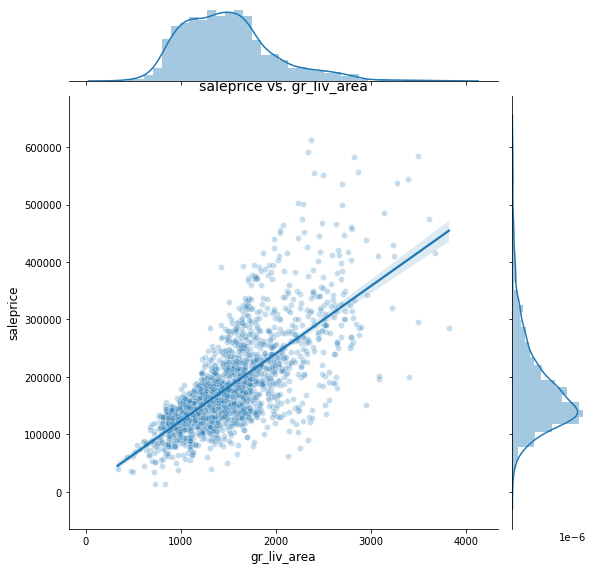

In [ ]:
joint(train, 'gr_liv_area', 'saleprice')

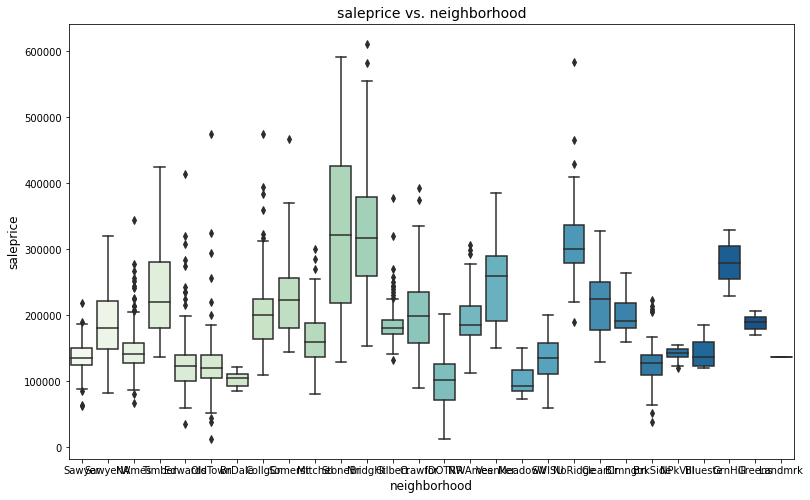

In [ ]:
box(train, 'neighborhood', 'saleprice')

However, analyzing the correlations reveal other features to be important predictors.

In [ ]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.803232
gr_liv_area,0.719437
exter_qual,0.714755
kitchen_qual,0.694063
total_bsmt_sf,0.664721
garage_area,0.655023
garage_cars,0.648298
1st_flr_sf,0.647866
bsmt_qual,0.613080


Text(0.5, 0.98, 'numeric heatmap')

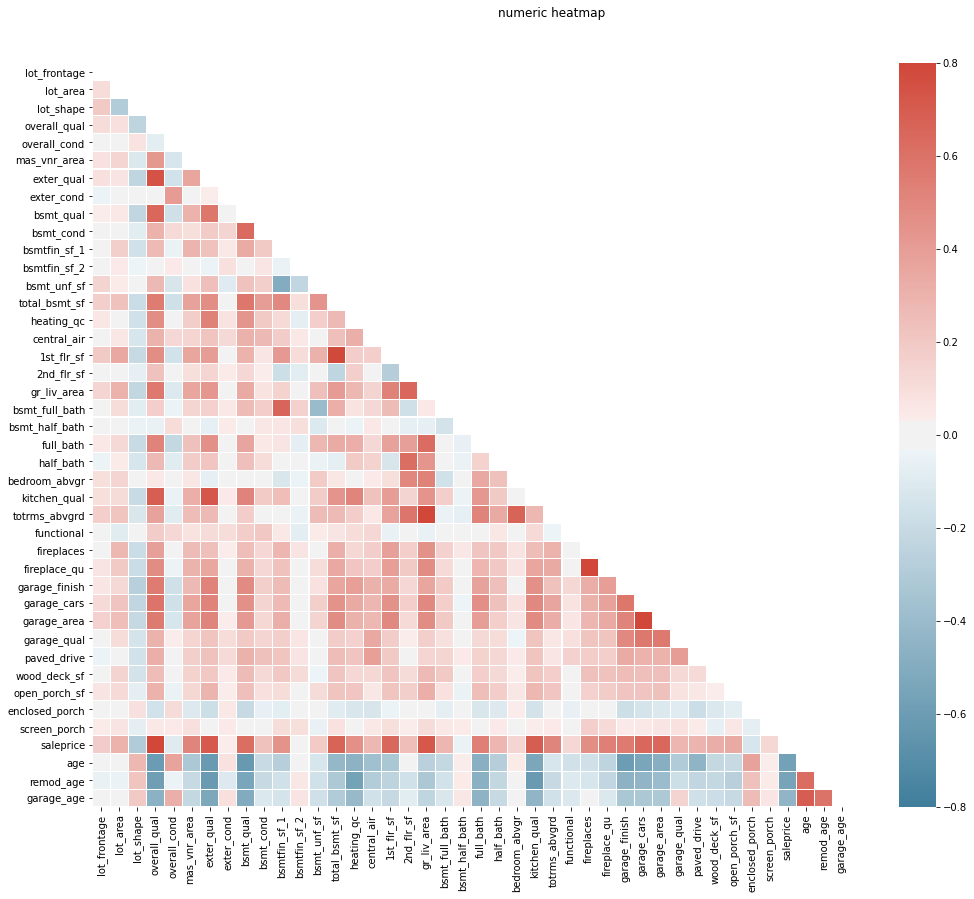

In [ ]:
# https://jovianlin.io/data-visualization-seaborn-part-2/

corr = train.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(17, 13))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(corr, 
                      mask=mask, 
                      ax=ax, 
                      cmap= sns.diverging_palette(230, 15, as_cmap=True),
                      vmin=-0.8, 
                      vmax=0.8, 
                      fmt='.1f',
                      linewidths=.05)

fig.subplots_adjust(top=.92)
fig.suptitle('numeric heatmap')

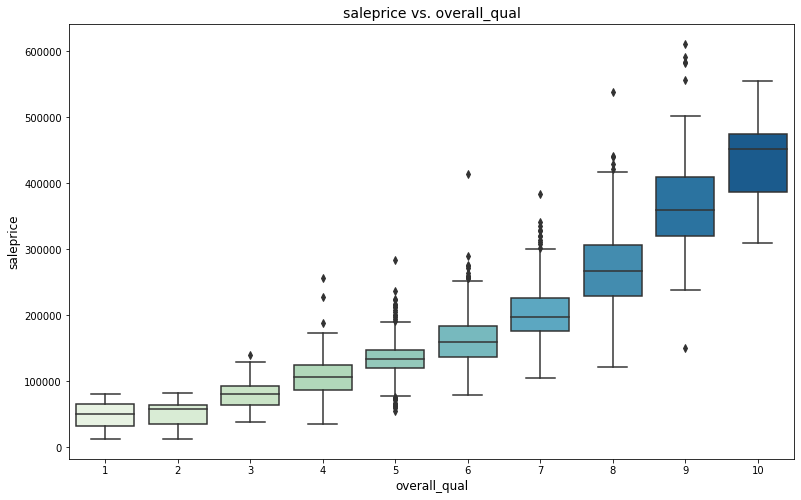

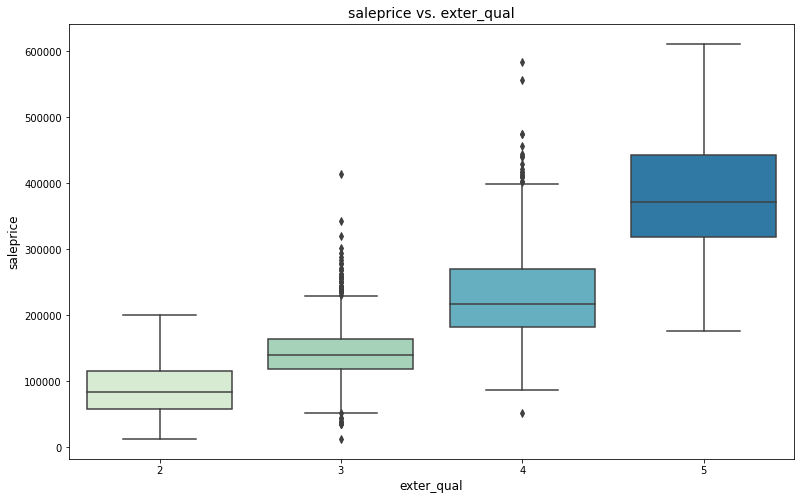

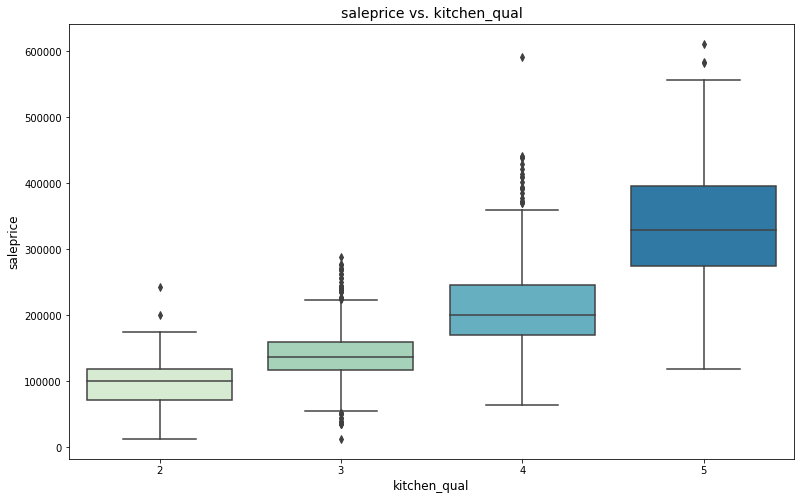

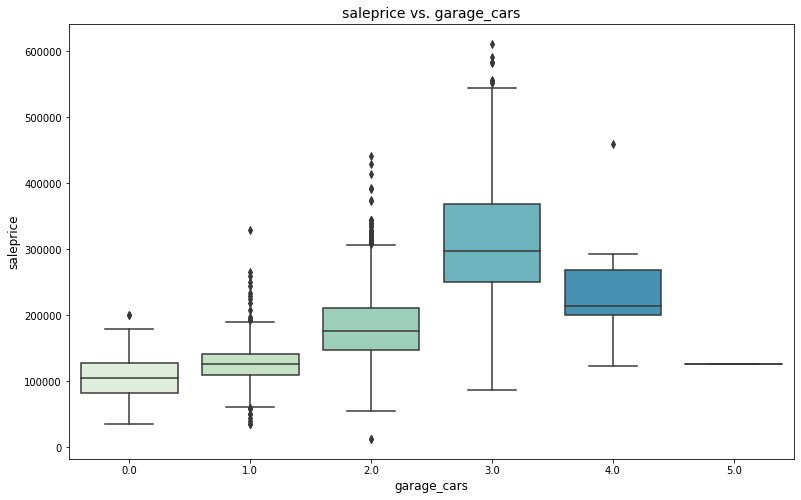

In [ ]:
for x in ['overall_qual', 'exter_qual', 'kitchen_qual', 'garage_cars']:
    box(train, x, 'saleprice')

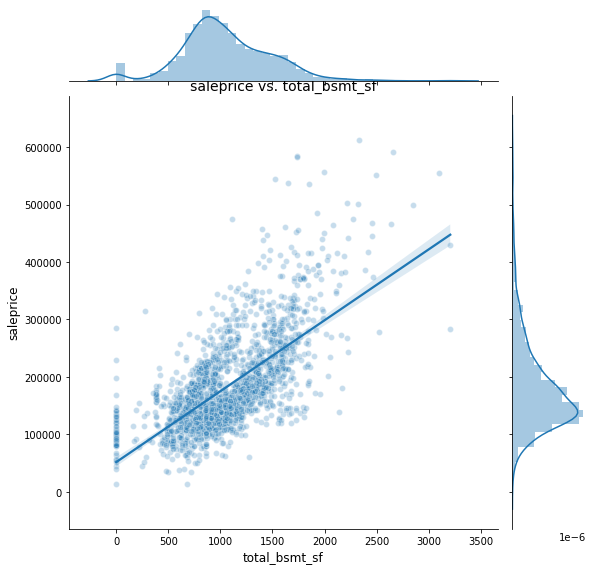

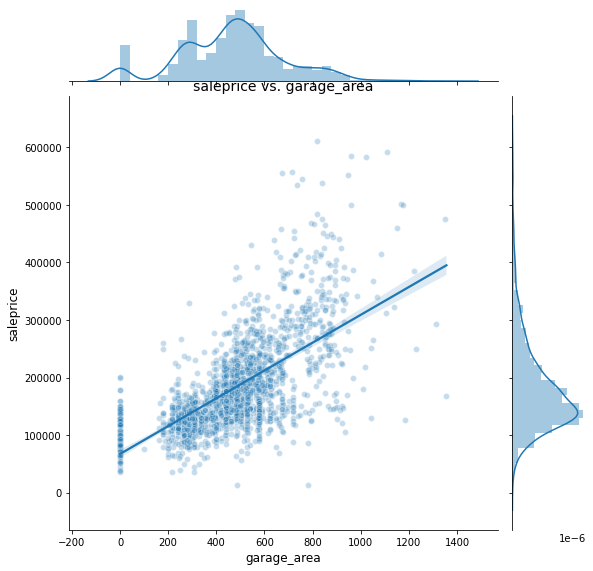

In [ ]:
for x in ['total_bsmt_sf', 'garage_area']:
    joint(train, x, 'saleprice')

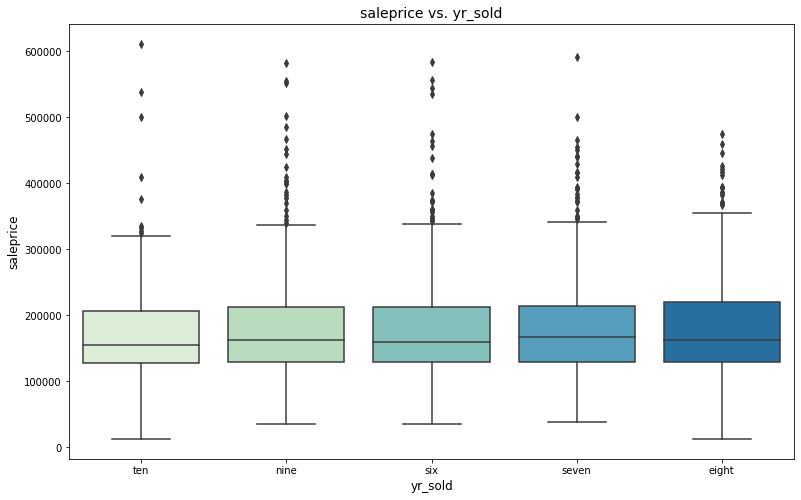

In [ ]:
box(train, 'yr_sold', 'saleprice')

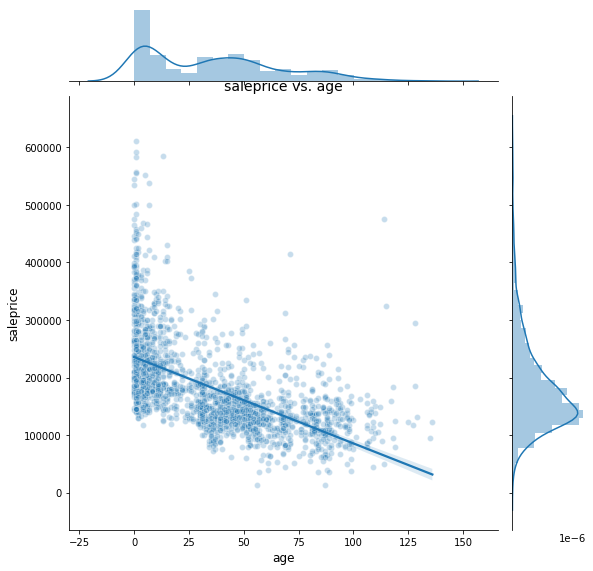

In [ ]:
joint(train, 'age', 'saleprice')

# Linear Regression

In [ ]:
# !pip install -q category_encoders
# !pip install -q eli5

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler, OneHotEncoder, FunctionTransformer, QuantileTransformer, RobustScaler
from sklearn.pipeline import Pipeline

from category_encoders import TargetEncoder

from scipy.stats import norm

import eli5

pd.set_option('display.max_rows',100)

Let's first take a look at the target variable.

In [ ]:
def compare_to_norm(X, name=None):
    sns.distplot(X, fit=norm);
    mean, stdev = norm.fit(X)
    print(f'mean = {mean:.1f} and stdev = {stdev:.1f}')
    plt.legend(['norm'], loc='best')
    plt.ylabel('frequency')
    if name:
        plt.title(f'{name} distribution')
    else:
        plt.title(f'{X.name} distribution')
    plt.show()

mean = 181398.7 and stdev = 79273.5


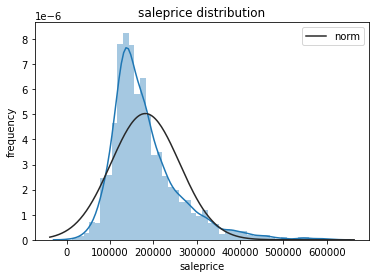

In [ ]:
compare_to_norm(target)

Looking at the skew of the target distribution, we most likely have to transform to make it more normally distributed.

mean = 12.0 and stdev = 0.4


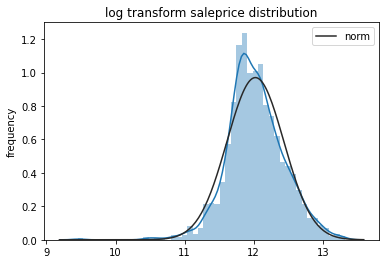

In [ ]:
transformer = FunctionTransformer(np.log1p, np.expm1, validate=True, check_inverse=True)
transformer.fit(train[['saleprice']])
transformed_target = transformer.fit_transform(train[['saleprice']])
compare_to_norm(transformed_target, 'log transform saleprice')

This is much closer to a normal distribution, suggesting we should fit our model to the log-transformed target.

## single linear regression

In [ ]:
np.log1p(train['saleprice'])

0       11.779136
1       12.301387
2       11.599112
3       12.066816
4       11.838633
          ...    
2046    12.607369
2047    11.320566
2048    12.083911
2049    11.877576
2050    12.149508
Name: saleprice, Length: 2047, dtype: float64

In [ ]:
def adjusted_r2(r2, obs, feats):
    
    # adjust r2 value based on number of observations and number of features
    adjusted = 1 - (1 - r2) * (obs - 1) / (obs - feats - 1)
    
    return adjusted

In [ ]:
def print_regression_stats(model, df, feature_cols=None, target_col='saleprice', test_size=0.7, random_state=111):
    
    if feature_cols:
        features = df.drop(columns=target_col)[feature_cols]
    else:
        features = df.drop(columns=target_col)
    target = df[target_col]
    target = np.log1p(target)

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, random_state=random_state, test_size=test_size)
    
    model.fit(X_train, y_train)

    y_hat_train = np.expm1(model.predict(X_train))
    y_hat_test = np.expm1(model.predict(X_test))
    
    adj_train = adjusted_r2(model.score(X_train, y_train), X_train.shape[0], X_train.shape[1])
    adj_test = adjusted_r2(model.score(X_test, y_test), X_test.shape[0], X_test.shape[1])

    print(f'train adj r2: {adj_train}')
    print(f'train rmse: {mean_squared_error(np.expm1(y_train), y_hat_train) ** 0.5}')
    print(f'test adj r2: {adj_test}')
    print(f'test rmse: {mean_squared_error(np.expm1(y_test), y_hat_test) ** 0.5}')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x = y_hat_test,
        y = np.expm1(y_test) - y_hat_test
    )
    plt.title('residuals vs. predicted', fontsize=12)
    plt.xlabel('predicted values', fontsize=10)
    plt.hlines(y = 0, xmin = y_hat_test.min(), xmax = y_hat_test.max(), color = "red")
    plt.show()

train adj r2: 0.6648441530180813
train rmse: 46942.443825593604
test adj r2: 0.6870567357650337
test rmse: 42367.61935214737


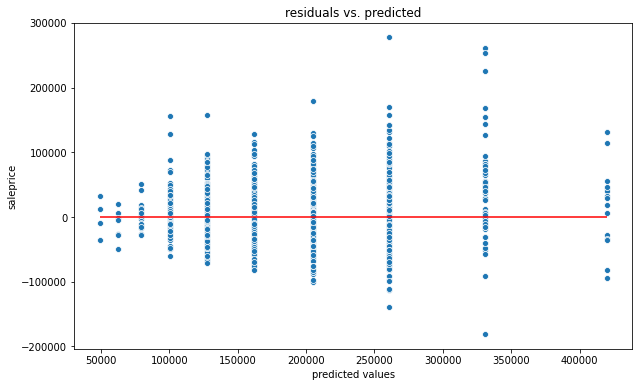

In [ ]:
feature_cols = ['overall_qual']

print_regression_stats(LinearRegression(), train, feature_cols, 'saleprice')

train adj r2: 0.5073472245743442
train rmse: 59311.85093570882
test adj r2: 0.49821148208487864
test rmse: 56675.155730257386


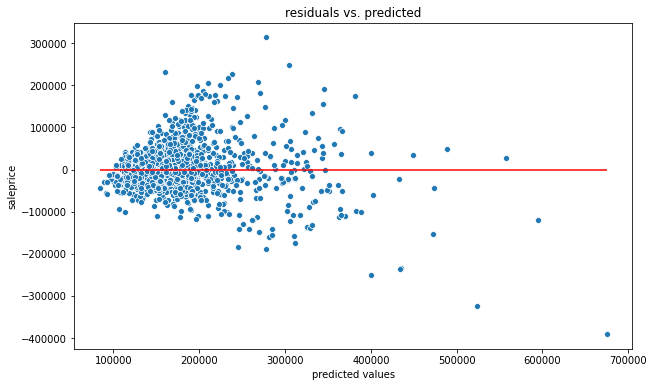

In [ ]:
feature_cols = ['gr_liv_area']

print_regression_stats(LinearRegression(), train, feature_cols, 'saleprice')

Our residuals do not appear to be:
- random
- evenly variant as a function of our predicted value
- insensitive to outliers

Therefore, we should attempt:
- using better (or more) features
- feature engineering
- further preprocessing of our data

## multiple linear regression

train adj r2: 0.7638650363248243
train rmse: 37112.47306001985
test adj r2: 0.7676743576974336
test rmse: 34784.15026566737


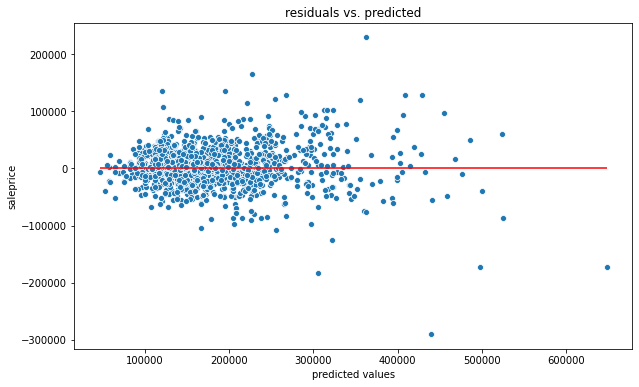

In [ ]:
feature_cols = ['gr_liv_area', 'overall_qual']

print_regression_stats(LinearRegression(), train, feature_cols, 'saleprice')

train adj r2: 0.7826270943975648
train rmse: 34773.79570831269
test adj r2: 0.7785258237763518
test rmse: 32962.3152034828


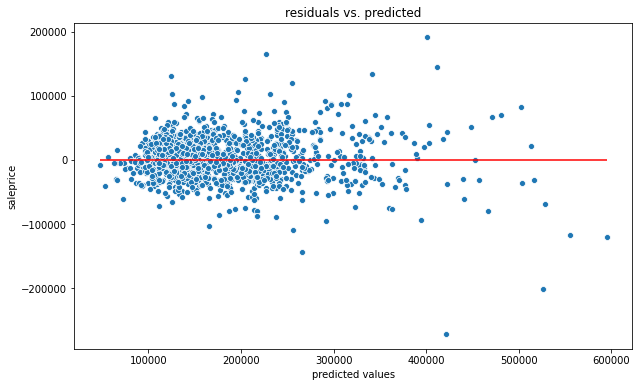

In [ ]:
feature_cols = ['gr_liv_area', 'overall_qual', 'exter_qual']

print_regression_stats(LinearRegression(), train, feature_cols, 'saleprice')

train adj r2: 0.915603160805666
train rmse: 21096.92073111763
test adj r2: 0.8932309601995221
test rmse: 24047.829362684362


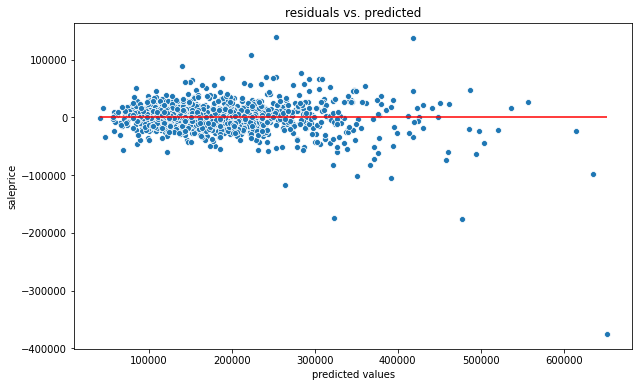

In [ ]:
feature_cols = features.select_dtypes(exclude=['O']).columns    # all numeric columns

print_regression_stats(LinearRegression(), train, feature_cols, 'saleprice')

train adj r2: 0.915603160805666
train rmse: 21096.920731117432
test adj r2: 0.8932309601995306
test rmse: 24047.829362684595


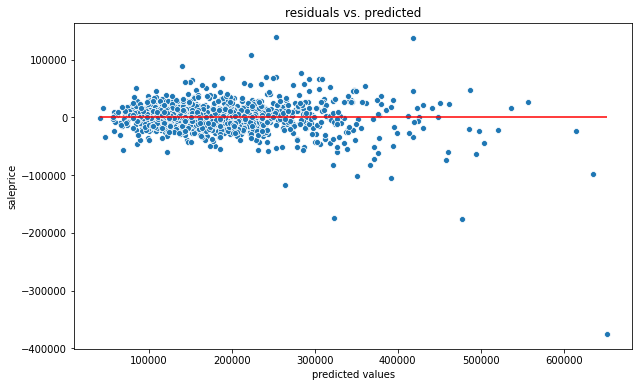

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', RobustScaler(), train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])

print_regression_stats(pipe, train, feature_cols, 'saleprice')

Going at this one-by-one is a time-consuming and probably fruitless task. We will discuss how to 'automate' this process later. The main takeaway is that we can see that adding in more features does improve our scores.

## using categorical features

One-hot encoding is the typical method of dealing with nominal features. However, as mentioned earlier, some of the features have high cardinality. This may introduce problems when cross-validating:

In [ ]:
# num_trans = Pipeline([
#     ('scale', )
# ])

# cat_trans = Pipeline([
#     ('onehot', OneHotEncoder(categories="auto",
#                              handle_unknown='ignore',
#                              sparse=False))
# ])

preprocessor = ColumnTransformer(transformers=[
    ('num', RobustScaler(), train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('cat', OneHotEncoder(), train.drop(columns='saleprice').select_dtypes(include=['O']).columns.values)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])

print_regression_stats(pipe, train)

ValueError: ignored

We can introduce another way of encoding, called **additive smoothing** (described [here](
https://maxhalford.github.io/blog/target-encoding/)). The `sklearn`-compatible package `category_encoders` actually has a **target encoding** with smoothing option that works similarly.

In [ ]:
to_target_encode = [train[col].value_counts().min() < 10 for col in train.select_dtypes(include=['O']).columns.values]
to_onehot = [not b for b in to_target_encode]
target_encode_col = train.select_dtypes(include=['O']).columns.values[to_target_encode]
onehot_col = train.select_dtypes(include=['O']).columns.values[to_onehot]
print(target_encode_col)
print()
print(onehot_col)

['ms_subclass' 'ms_zoning' 'lot_config' 'neighborhood' 'condition_1'
 'house_style' 'roof_style' 'exterior_1st' 'exterior_2nd' 'foundation'
 'electrical' 'sale_type']

['land_contour' 'bldg_type' 'mas_vnr_type' 'bsmt_exposure'
 'bsmtfin_type_1' 'bsmtfin_type_2' 'garage_type' 'mo_sold' 'yr_sold']


train adj r2: 0.9307854682125101
train rmse: 18635.815521508917
test adj r2: 0.8965241181719007
test rmse: 21600.97861902483


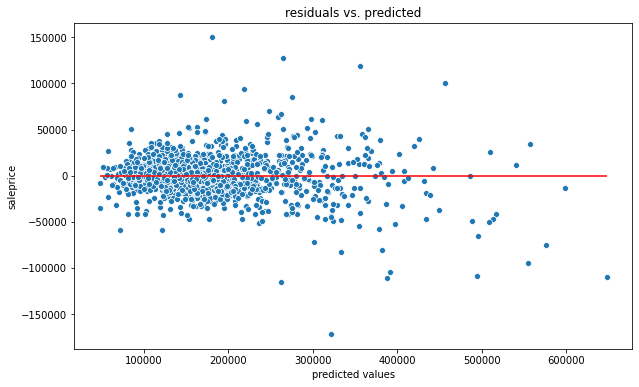

In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])

print_regression_stats(pipe, train)

While the residuals still do not appear to be homoskedastic, we get a small improvement incorporating all of the categorical features and using target encoding / additive smoothing.

Getting feature names from pipelines is a little tricky, so we'll follow [this guide](https://towardsdatascience.com/extracting-feature-importances-from-scikit-learn-pipelines-18c79b4ae09a).

In [ ]:
def print_regression_stats_2(model, df, feature_cols=None, target_col='saleprice', test_size=0.7, random_state=111):

    if feature_cols:
        features = df.drop(columns=target_col)[feature_cols]
    else:
        features = df.drop(columns=target_col)
    target = df[target_col]
    target = np.log1p(target)

    X_train, X_test, y_train, y_test = train_test_split(
        features, target, random_state=random_state, test_size=test_size)
    
    model.fit(X_train, y_train)

    y_hat_train = np.expm1(model.predict(X_train))
    y_hat_test = np.expm1(model.predict(X_test))
    
    adj_train = adjusted_r2(model.score(X_train, y_train), X_train.shape[0], X_train.shape[1])
    adj_test = adjusted_r2(model.score(X_test, y_test), X_test.shape[0], X_test.shape[1])

    print(f'train adj r2: {adj_train}')
    print(f'train rmse: {mean_squared_error(np.expm1(y_train), y_hat_train) ** 0.5}')
    print(f'test adj r2: {adj_test}')
    print(f'test rmse: {mean_squared_error(np.expm1(y_test), y_hat_test) ** 0.5}')

    try:
        alpha = model.named_steps['estimator'].alpha_
        ratio = model.named_steps['estimator'].l1_ratio_
        print(f'alpha: {alpha}')
        print(f'l1 ratio: {ratio}')
    except:
        print()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x = y_hat_test,
        y = np.expm1(y_test) - y_hat_test
    )
    plt.title('residuals vs. predicted', fontsize=12)
    plt.xlabel('predicted values', fontsize=10)
    plt.hlines(y = 0, xmin = y_hat_test.min(), xmax = y_hat_test.max(), color = "red")
    plt.show()

    onehot_columns = list(model.named_steps['preprocessor'].named_transformers_['ohe'].get_feature_names(input_features=onehot_col))
    target_columns = list(model.named_steps['preprocessor'].named_transformers_['target'].get_feature_names())
    numeric_features_list = list(features.select_dtypes(exclude=['O']).columns.values)
    numeric_features_list.extend(onehot_columns)
    numeric_features_list.extend(target_columns)

    return eli5.explain_weights(model.named_steps['estimator'], top=50, feature_names=numeric_features_list)

train adj r2: 0.9233382120704784
train rmse: 19814.081628755346
test adj r2: 0.8998143292863154
test rmse: 21410.02596896072
alpha: 0.0011659144011798312


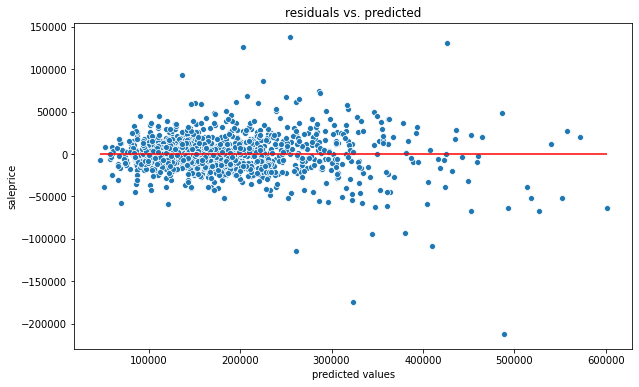

Weight?,Feature
+9.007,<BIAS>
+0.142,gr_liv_area
+0.108,overall_qual
+0.067,bsmtfin_sf_1
+0.062,ms_zoning
+0.062,ms_subclass
+0.059,bsmt_exposure_3
+0.056,neighborhood
+0.046,bldg_type_1Fam
+0.044,central_air


In [ ]:
print_regression_stats_2(pipe, train)

# Regularized Linear Regression

train adj r2: 0.9233382120704784
train rmse: 19814.081628755346
test adj r2: 0.8998143292863154
test rmse: 21410.02596896072
alpha: 0.0011659144011798312


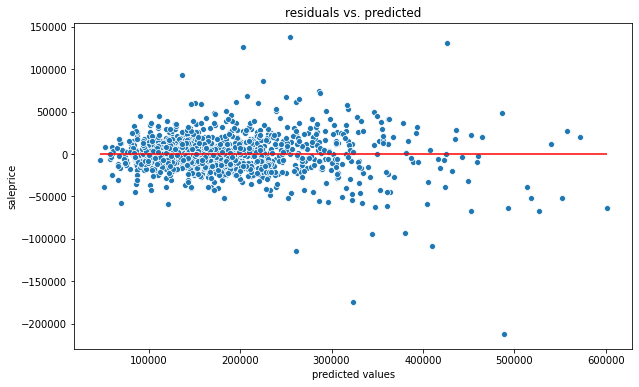

Weight?,Feature
+9.007,<BIAS>
+0.142,gr_liv_area
+0.108,overall_qual
+0.067,bsmtfin_sf_1
+0.062,ms_zoning
+0.062,ms_subclass
+0.059,bsmt_exposure_3
+0.056,neighborhood
+0.046,bldg_type_1Fam
+0.044,central_air


In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', LassoCV(
        alphas=np.logspace(-4, 0, 16),
        cv=5
    ))
])

print_regression_stats_2(pipe, train)

train adj r2: 0.9257196841744338
train rmse: 19320.913047672722
test adj r2: 0.899743554842844
test rmse: 21268.91503127153
alpha: 15.848931924611142


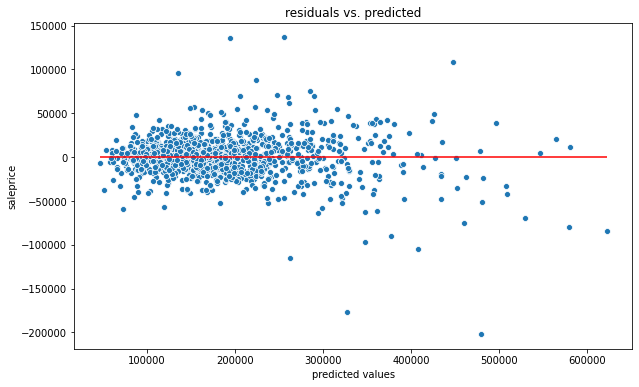

Weight?,Feature
+7.829,<BIAS>
+0.096,overall_qual
+0.090,gr_liv_area
+0.055,ms_subclass
+0.055,1st_flr_sf
+0.054,ms_zoning
+0.053,central_air
+0.051,total_bsmt_sf
+0.050,neighborhood
+0.045,bsmt_exposure_3


In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', RidgeCV(
        alphas=np.logspace(-2, 2, 16),
        cv=5
    ))
])

print_regression_stats_2(pipe, train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.786162115924355, tolerance: 0.008406230570582205
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.70114186774831, tolerance: 0.008406230570582205
  tol, rng, random, positive)
/usr/

train adj r2: 0.9216360373673936
train rmse: 19969.308895772814
test adj r2: 0.8999206904815029
test rmse: 21423.451399725276
alpha: 0.011721022975334805
l1 ratio: 0.1


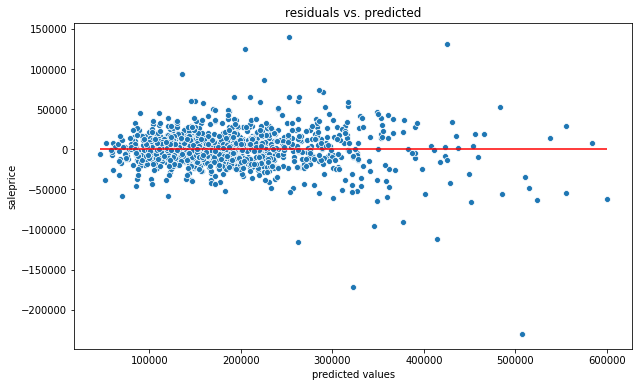

Weight?,Feature
+9.657,<BIAS>
+0.121,gr_liv_area
+0.105,overall_qual
+0.062,bsmtfin_sf_1
+0.052,ms_subclass
+0.051,neighborhood
+0.050,bsmt_exposure_3
+0.047,ms_zoning
+0.043,total_bsmt_sf
+0.041,bldg_type_1Fam


In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', ElasticNetCV(
        l1_ratio=np.linspace(0, 1, 21),
        alphas=np.logspace(-4, 2, 30),
        cv=5
    ))
])

print_regression_stats_2(pipe, train)

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

train adj r2: 0.9826635988271778
train rmse: 11227.652231962022
test adj r2: 0.8525581502122838
test rmse: 25382.94515949057



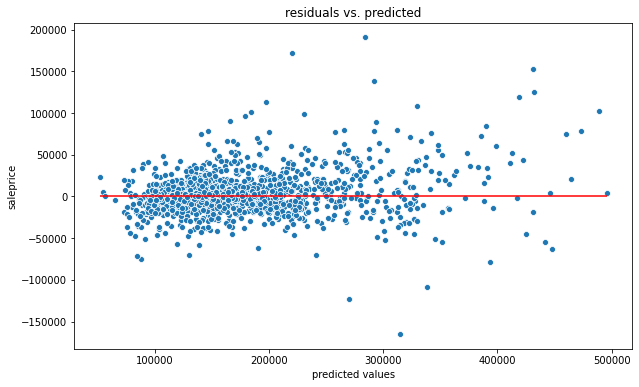

Weight,Feature
0.3395 ± 0.4391,overall_qual
0.1049 ± 0.3770,age
0.1021 ± 0.1004,gr_liv_area
0.0837 ± 0.2789,neighborhood
0.0648 ± 0.1188,garage_area
0.0432 ± 0.0673,total_bsmt_sf
0.0303 ± 0.0670,1st_flr_sf
0.0237 ± 0.0496,bsmtfin_sf_1
0.0207 ± 0.0638,central_air
0.0188 ± 0.1634,kitchen_qual


In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor())
])

print_regression_stats_2(pipe, train)

train adj r2: 0.9444928050625644
train rmse: 19323.783366794058
test adj r2: 0.8538934768615607
test rmse: 25824.97826246556



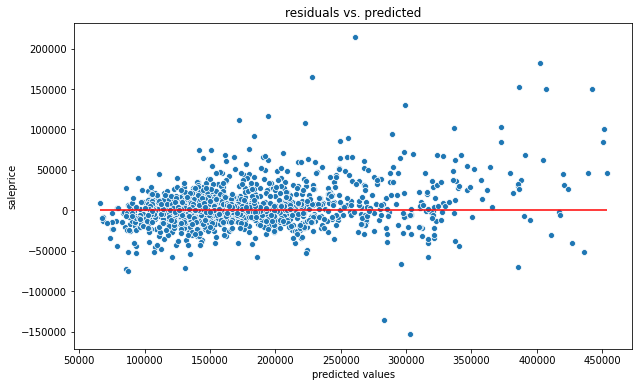

Weight,Feature
0.2476 ± 0.4544,overall_qual
0.1388 ± 0.4241,age
0.1163 ± 0.3608,neighborhood
0.0923 ± 0.1182,gr_liv_area
0.0575 ± 0.1171,garage_area
0.0490 ± 0.2728,exter_qual
0.0383 ± 0.0673,total_bsmt_sf
0.0375 ± 0.0757,1st_flr_sf
0.0215 ± 0.1749,kitchen_qual
0.0208 ± 0.0493,bsmtfin_sf_1


In [ ]:
num_trans = Pipeline([
    ('scale', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_trans, train.drop(columns='saleprice').select_dtypes(exclude=['O']).columns.values),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore', sparse=False), onehot_col),
    ('target', TargetEncoder(cols=target_encode_col), target_encode_col)
])

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor(
        n_estimators=600,
        min_samples_leaf=5,
        max_features=0.5
    ))
])

print_regression_stats_2(pipe, train)